# Dublin City Bike Report

## Forecast how the city-bike usage would have been without the pandemic

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data processing

Note: The dataset, due to its size, has been reduced to three bike statations and merged to the timeframe 1/8/2018 to 1/1/2022

### Remove additional columns

In [2]:
dataset = pd.read_csv("all_merged.csv") # a merged set of Dublin bike data from 1/8/2018 to 1/1/2022
dataset = dataset.drop(columns = {'STATUS','ADDRESS','LAST UPDATED'})
#dataset.columns

### Station names

In [3]:
print(np.unique(dataset['NAME']))

['CITY QUAY' 'GRANGEGORMAN LOWER (CENTRAL)' 'PEARSE STREET']


### Separating station data

In [4]:
mask_pearse = dataset.NAME == 'PEARSE STREET'
pearse = dataset[mask_pearse]

mask_city = dataset.NAME == 'CITY QUAY'
city = dataset[mask_city]

mask_grange = dataset.NAME == 'GRANGEGORMAN LOWER (CENTRAL)'
grange = dataset[mask_grange]

### Station Information

Organise datetime 

In [5]:
#pearse_dates = pd.to_datetime(pearse.TIME, format = "%Y-%m-%d %H:%M:%S")
#city_dates = pd.to_datetime(city.TIME, format = "%Y-%m-%d %H:%M:%S")
#grange_dates = pd.to_datetime(grange.TIME, format = "%Y-%m-%d %H:%M:%S")

### Bike availability

In [6]:
#Group total number of bikes available by time
pearse_bikes_av = pearse.groupby('TIME').agg('sum')['AVAILABLE BIKE STANDS']
times_pearse = np.unique(pearse.TIME)

city_bikes_av = city.groupby('TIME').agg('sum')['AVAILABLE BIKE STANDS']
times_city = np.unique(city.TIME)

grange_bikes_av = grange.groupby('TIME').agg('sum')['AVAILABLE BIKE STANDS']
times_grange = np.unique(grange.TIME)
times_grange

array(['2018-08-01 12:30:02', '2018-08-01 12:35:02',
       '2018-08-01 12:40:02', ..., '2022-01-01 23:45:02',
       '2022-01-01 23:50:02', '2022-01-01 23:55:02'], dtype=object)

In [7]:
# Resample by day
pearse_bikes_av.index = (pd.to_datetime(times_pearse, format = "%Y-%m-%d %H:%M:%S"))
pearse_bikes_av_resample = pearse_bikes_av.resample('D', level = 0).mean()

city_bikes_av.index = (pd.to_datetime(times_city, format = "%Y-%m-%d %H:%M:%S"))
city_bikes_av_resample = city_bikes_av.resample('D', level = 0).mean()

grange_bikes_av.index = (pd.to_datetime(times_grange, format = "%Y-%m-%d %H:%M:%S"))
grange_bikes_av_resample = grange_bikes_av.resample('D', level = 0).mean()

In [8]:
### Check for missing values
pearse_bikes_av_resample.isnull().sum()
city_bikes_av_resample.isnull().sum()
grange_bikes_av_resample.isnull().sum()

45

### Add in missing values

In [9]:
# Use interpolate function to add missing values and check 
pearse_bikes_av_resample = pearse_bikes_av_resample.interpolate()

city_bikes_av_resample = city_bikes_av_resample.interpolate()

grange_bikes_av_resample = grange_bikes_av_resample.interpolate()


### Finding values greater than 30 or 40 (values greater than the number of bikes)

In [10]:
(pearse_bikes_av_resample > 30).sum() # we have 6 values greater than 30 (the maximum number of bikes at the station) so we should replace these (with 30 here)
(city_bikes_av_resample > 30).sum() # similar number here
(grange_bikes_av_resample > 40).sum() # max of 40 bikes at this station

10

### Replacing values great than 30 or 40

In [11]:
pearse_bikes_av_resample = pearse_bikes_av_resample.mask(pearse_bikes_av_resample > 30, 30)
city_bikes_av_resample = city_bikes_av_resample.mask(city_bikes_av_resample > 30, 30)
grange_bikes_av_resample = grange_bikes_av_resample.mask(grange_bikes_av_resample > 40, 40)

## Plotting

### Scatterplot of bike usage in days over entire time period at Pearse Street Station

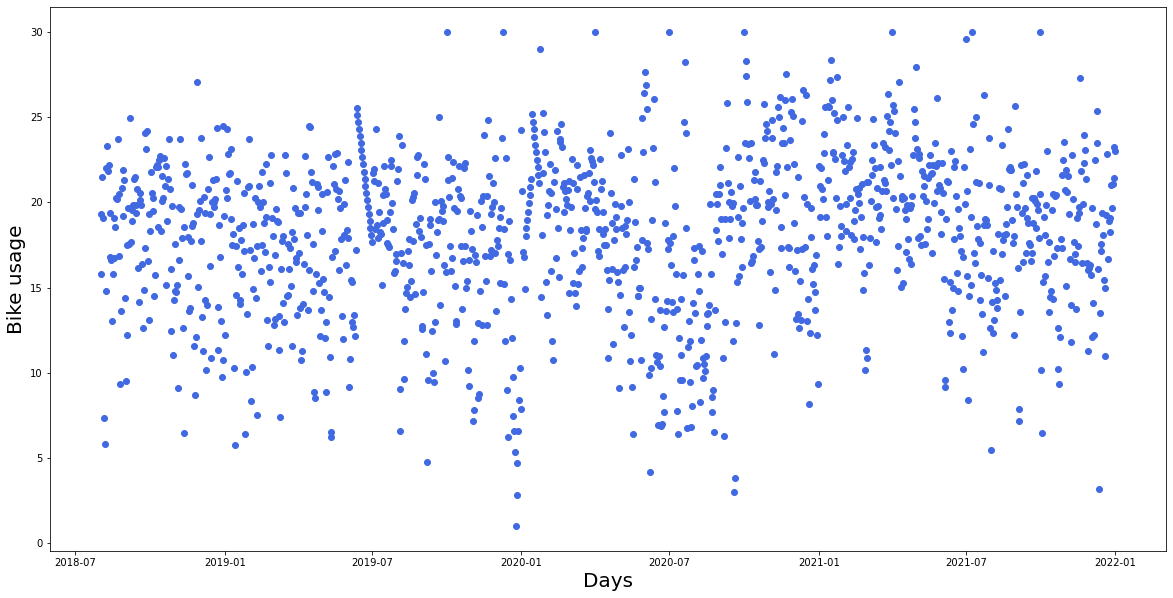

In [13]:
plt.figure(figsize=(20, 10))
plt.scatter(pearse_bikes_av_resample.index, pearse_bikes_av_resample, color='royalblue')
plt.xlabel('Days', size=20)
plt.ylabel('Bike usage', size=20)
plt.savefig('images/scatter_bike_usage.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Line plot of bike usage in days over entire time period

In [14]:
time_pearse = pearse_bikes_av_resample.index
stands_pearse = pearse_bikes_av_resample

time_city = city_bikes_av_resample.index
stands_city = city_bikes_av_resample

time_grange = grange_bikes_av_resample.index
stands_grange = grange_bikes_av_resample

<function matplotlib.pyplot.show(close=None, block=None)>

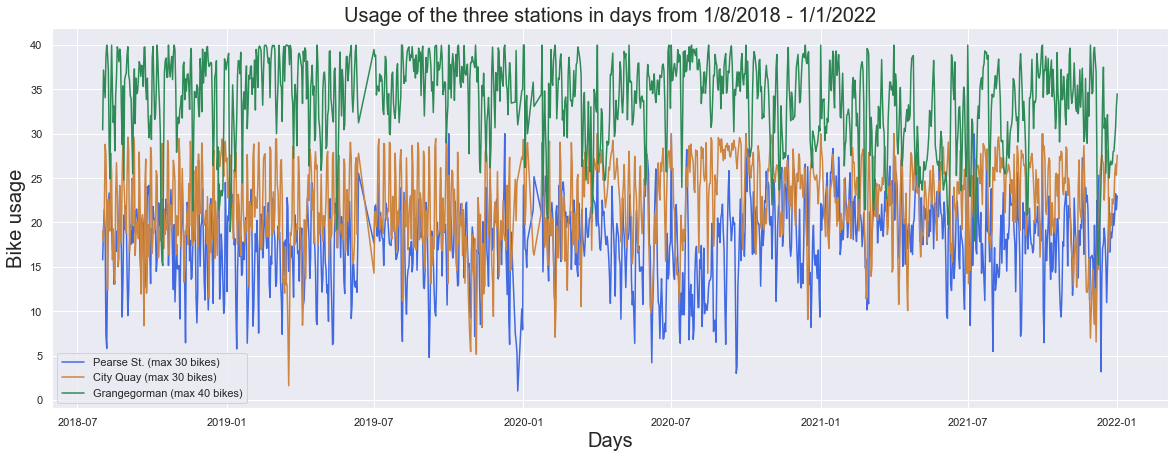

In [15]:
sns.set()
plt.figure(figsize=(20, 7))
plt.title('Usage of the three stations in days from 1/8/2018 - 1/1/2022', size=20)
plt.plot(time_pearse, stands_pearse, color='royalblue', label='Pearse St. (max 30 bikes)')
plt.plot(time_city, stands_city, color='peru', label='City Quay (max 30 bikes)')
plt.plot(time_grange, stands_grange, color='seagreen', label='Grangegorman (max 40 bikes)')
plt.legend()
plt.xlabel('Days', size=20)
plt.ylabel('Bike usage', size=20)
plt.savefig('images/pandemic_bike_usage.jpg', dpi=300, bbox_inches='tight')
plt.show

### Date range of interest before pandemic

In [16]:
pearse_tt_range = pearse_bikes_av_resample.index[:589] # 588 days of total range
pearse_bike_range = pearse_bikes_av_resample[:589] # 588 days

city_tt_range = city_bikes_av_resample.index[:589] # 588 days
city_bike_range = city_bikes_av_resample[:589] # 588 days

grange_tt_range = grange_bikes_av_resample.index[:589] # 588 days
grange_bike_range = grange_bikes_av_resample[:589] # 588 days

<function matplotlib.pyplot.show(close=None, block=None)>

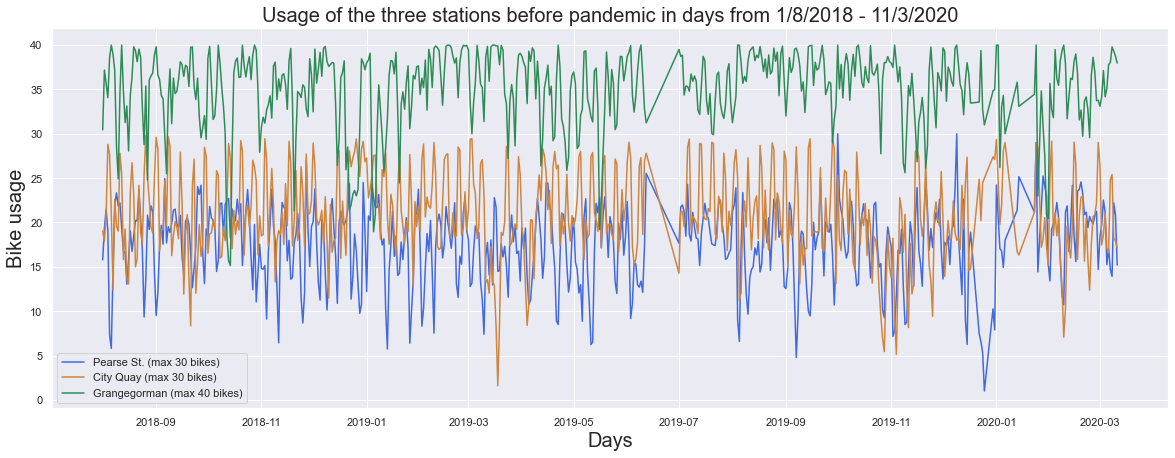

In [17]:
sns.set()
plt.figure(figsize=(20, 7))
plt.title('Usage of the three stations before pandemic in days from 1/8/2018 - 11/3/2020', size=20)
plt.plot(pearse_tt_range, pearse_bike_range, color='royalblue', label='Pearse St. (max 30 bikes)')
plt.plot(city_tt_range, city_bike_range, color='peru', label='City Quay (max 30 bikes)')
plt.plot(grange_tt_range, grange_bike_range, color='seagreen', label='Grangegorman (max 40 bikes)')
plt.legend()
plt.xlabel('Days', size=20)
plt.ylabel('Bike usage', size=20)
plt.savefig('images/prepandemic_bike_usage.jpg', dpi=300, bbox_inches='tight')
plt.show

## Predicting
Estimating bike usage during the pandemic period from 12th March 2020 to 11th March 2021 as if the pandemic hadn't happened.

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
#!pip3 install pmdarima
import pmdarima as pm

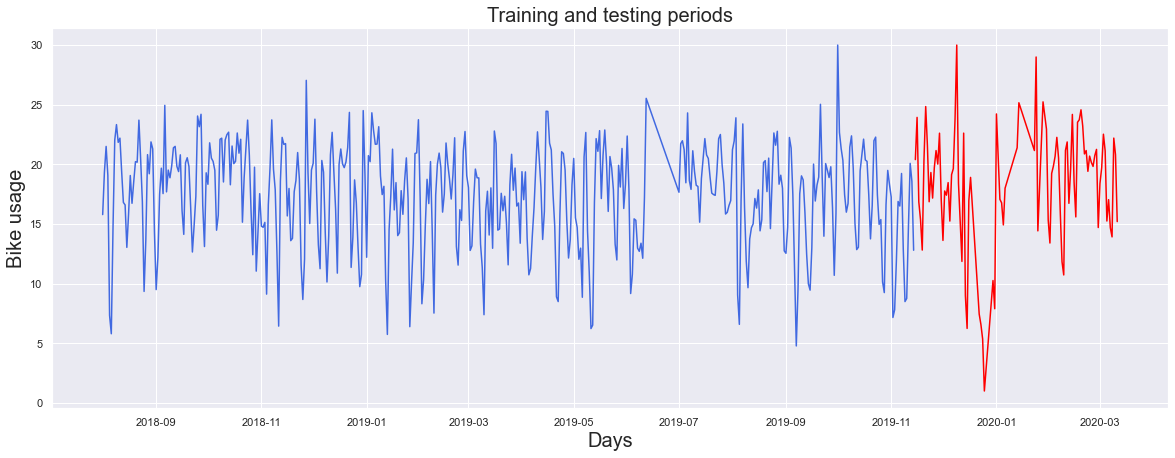

In [19]:
y_train = pearse_bike_range[pearse_bike_range.index < pd.to_datetime("2019-11-15", format='%Y-%m-%d %H:%M:%S')]
y_test = pearse_bike_range[pearse_bike_range.index > pd.to_datetime("2019-11-14", format='%Y-%m-%d %H:%M:%S')]

plt.figure(figsize=(20, 7))
plt.plot(y_train, label='Training', color = 'royalblue')
plt.plot(y_test, label='Testing', color = 'red')
plt.xlabel('Days', size=20)
plt.ylabel('Bike usage', size=20)
plt.title('Training and testing periods', size=20)
plt.savefig('images/training_testing.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Checking for stationarity

In [20]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(y_train)

(0.01, False)

Model data is non-stationary so we need to use the 'integrated' function in our model. We'll let the model determine the best 'd' by setting 'd=None'.

### Fit the auto arima model

In [21]:
smodel = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=28,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[28] intercept   : AIC=inf, Time=8.28 sec
 ARIMA(0,0,0)(0,1,0)[28] intercept   : AIC=2703.361, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[28] intercept   : AIC=2521.241, Time=2.05 sec
 ARIMA(0,0,1)(0,1,1)[28] intercept   : AIC=inf, Time=6.18 sec
 ARIMA(0,0,0)(0,1,0)[28]             : AIC=2701.745, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[28] intercept   : AIC=2594.342, Time=0.29 sec
 ARIMA(1,0,0)(2,1,0)[28] intercept   : AIC=2487.678, Time=7.39 sec
 ARIMA(1,0,0)(2,1,1)[28] intercept   : AIC=inf, Time=21.09 sec
 ARIMA(1,0,0)(1,1,1)[28] intercept   : AIC=inf, Time=6.15 sec
 ARIMA(0,0,0)(2,1,0)[28] intercept   : AIC=2593.069, Time=5.09 sec
 ARIMA(2,0,0)(2,1,0)[28] intercept   : AIC=2477.577, Time=8.54 sec
 ARIMA(2,0,0)(1,1,0)[28] intercept   : AIC=2511.058, Time=2.74 sec
 ARIMA(2,0,0)(2,1,1)[28] intercept   : AIC=inf, Time=31.32 sec
 ARIMA(2,0,0)(1,1,1)[28] intercept   : AIC=inf, Time=10.81 sec
 ARIMA(3,0,0)(2,1,0)[28] intercept   : AIC=247

### Forecast the test period

In [22]:
prediction = pd.DataFrame(smodel.predict(n_periods = 118), index=y_test.index)
prediction.columns = ['Predicted Daily Usage']
prediction

,Predicted Daily Usage
2019-11-15,14.661098
2019-11-16,19.190118
2019-11-17,17.777424
2019-11-18,16.921438
2019-11-19,21.174757
...,...
2020-03-07,19.459772
2020-03-08,16.844607
2020-03-09,16.579812
2020-03-10,21.325137


### Plot test forecast

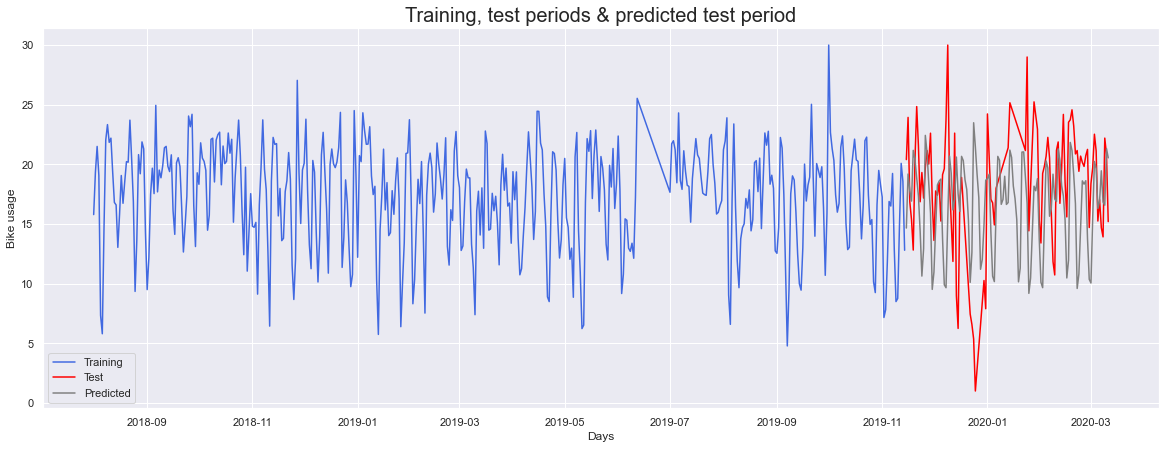

In [23]:
plt.figure(figsize=(20, 7))
plt.plot(y_train, label='Training', color='royalblue')
plt.plot(y_test, label='Test', color='red')
plt.plot(prediction, label='Predicted', color='grey')
plt.legend(loc = 'lower left')
plt.title('Training, test periods & predicted test period', size=20)
plt.xlabel('Days')
plt.ylabel('Bike usage')
plt.savefig('images/train_test_predicted.jpg', dpi=300, bbox_inches='tight')
plt.show()

Now that we've tested let's retrain on the full period before the pandemic.
Check for stationarity

In [24]:
#pearse_bike_range
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(pearse_bike_range)

#city_bike_range
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(city_bike_range)

#grange_bike_range
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(grange_bike_range)

(0.01, False)

Periods are all non-stationary. Time to fit the models


In [25]:
# Pearse station full train

pearse_model = pm.auto_arima(pearse_bike_range, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=28,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[28] intercept   : AIC=inf, Time=10.14 sec
 ARIMA(0,0,0)(0,1,0)[28] intercept   : AIC=3596.306, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[28] intercept   : AIC=3239.707, Time=2.75 sec
 ARIMA(0,0,1)(0,1,1)[28] intercept   : AIC=inf, Time=11.22 sec
 ARIMA(0,0,0)(0,1,0)[28]             : AIC=3594.482, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[28] intercept   : AIC=3365.296, Time=0.32 sec
 ARIMA(1,0,0)(2,1,0)[28] intercept   : AIC=3204.459, Time=8.79 sec
 ARIMA(1,0,0)(2,1,1)[28] intercept   : AIC=inf, Time=23.43 sec
 ARIMA(1,0,0)(1,1,1)[28] intercept   : AIC=inf, Time=9.44 sec
 ARIMA(0,0,0)(2,1,0)[28] intercept   : AIC=3409.436, Time=7.14 sec
 ARIMA(2,0,0)(2,1,0)[28] intercept   : AIC=3201.857, Time=12.10 sec
 ARIMA(2,0,0)(1,1,0)[28] intercept   : AIC=3237.353, Time=3.65 sec
 ARIMA(2,0,0)(2,1,1)[28] intercept   : AIC=inf, Time=38.60 sec
 ARIMA(2,0,0)(1,1,1)[28] intercept   : AIC=inf, Time=14.45 sec
 ARIMA(3,0,0)(2,1,0)[28] intercept   : AIC=

### Predicting pandemic period

Forecast the next year

In [26]:
# Splitting time periods for training and predicting at Pearse St.
pearse_y_train = stands_pearse[stands_pearse.index < pd.to_datetime("2020-03-12", format='%Y-%m-%d %H:%M:%S')]
pearse_y_test = stands_pearse[stands_pearse.index > pd.to_datetime("2020-03-11", format='%Y-%m-%d %H:%M:%S')]

In [27]:
pearse_prediction = pd.DataFrame(pearse_model.predict(n_periods = 661), index=pearse_y_test.index)
prediction.columns = ['Predicted Daily Usage']
pearse_prediction

,0
2020-03-12,17.681704
2020-03-13,20.267722
2020-03-14,17.264586
2020-03-15,15.076202
2020-03-16,17.957831
...,...
2021-12-28,19.852539
2021-12-29,21.767013
2021-12-30,21.368098
2021-12-31,18.726231


### Plot total period with predicted values for Pearse St. without the pandemic

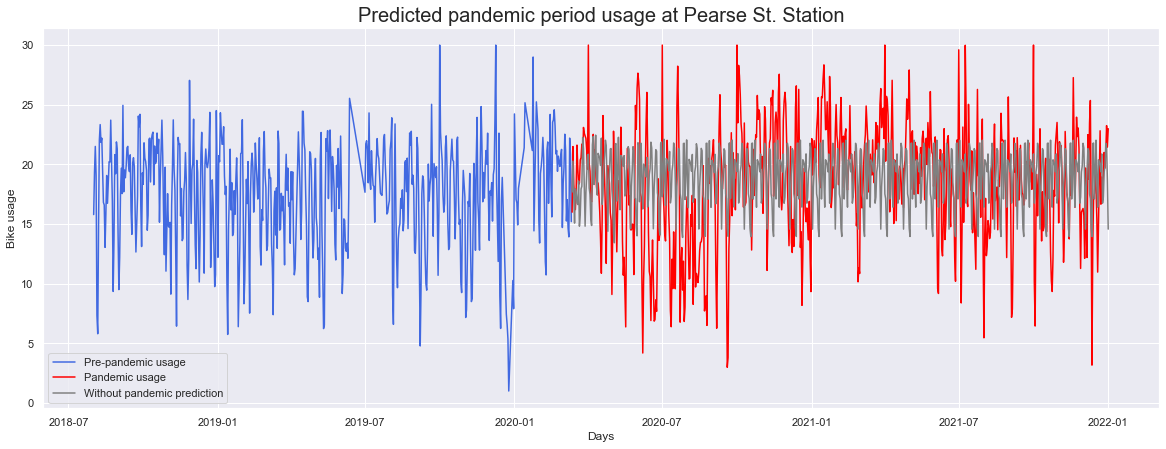

In [28]:
plt.figure(figsize=(20, 7))
plt.plot(pearse_y_train, label='Pre-pandemic usage', color='royalblue')
plt.plot(pearse_y_test, label='Pandemic usage', color='red')
plt.plot(pearse_prediction, label='Without pandemic prediction', color='grey')
plt.legend(loc = 'lower left')
plt.title('Predicted pandemic period usage at Pearse St. Station', size=20)
plt.xlabel('Days')
plt.ylabel('Bike usage')
plt.savefig('images/pearse_predicted.jpg', dpi=300, bbox_inches='tight')
plt.show()

### City Quay Station

In [29]:
# Splitting time periods for training and predicting at City Quay Station
city_y_train = stands_city[stands_city.index < pd.to_datetime("2020-03-12", format='%Y-%m-%d %H:%M:%S')]
city_y_test = stands_city[stands_city.index > pd.to_datetime("2020-03-11", format='%Y-%m-%d %H:%M:%S')]


In [30]:
# City Quay full train

city_model = pm.auto_arima(city_bike_range, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=28,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[28] intercept   : AIC=inf, Time=9.84 sec
 ARIMA(0,0,0)(0,1,0)[28] intercept   : AIC=3574.102, Time=0.39 sec
 ARIMA(1,0,0)(1,1,0)[28] intercept   : AIC=3198.580, Time=5.42 sec
 ARIMA(0,0,1)(0,1,1)[28] intercept   : AIC=inf, Time=7.81 sec
 ARIMA(0,0,0)(0,1,0)[28]             : AIC=3572.129, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[28] intercept   : AIC=3329.292, Time=0.66 sec
 ARIMA(1,0,0)(2,1,0)[28] intercept   : AIC=3150.588, Time=12.81 sec
 ARIMA(1,0,0)(2,1,1)[28] intercept   : AIC=inf, Time=21.96 sec
 ARIMA(1,0,0)(1,1,1)[28] intercept   : AIC=inf, Time=8.10 sec
 ARIMA(0,0,0)(2,1,0)[28] intercept   : AIC=3394.413, Time=9.85 sec
 ARIMA(2,0,0)(2,1,0)[28] intercept   : AIC=3150.885, Time=16.30 sec
 ARIMA(1,0,1)(2,1,0)[28] intercept   : AIC=3149.742, Time=20.70 sec
 ARIMA(1,0,1)(1,1,0)[28] intercept   : AIC=3198.001, Time=7.63 sec
 ARIMA(1,0,1)(2,1,1)[28] intercept   : AIC=inf, Time=29.81 sec
 ARIMA(1,0,1)(1,1,1)[28] intercept   : 

In [31]:
city_prediction = pd.DataFrame(city_model.predict(n_periods = 661), index=city_y_test.index)
prediction.columns = ['Predicted Daily Usage']
city_prediction

,0
2020-03-12,17.875598
2020-03-13,19.833819
2020-03-14,24.018980
2020-03-15,23.823867
2020-03-16,18.486616
...,...
2021-12-28,19.315259
2021-12-29,22.034610
2021-12-30,20.294425
2021-12-31,19.565784


### Plot total period with predicted values for City Quay without the pandemic

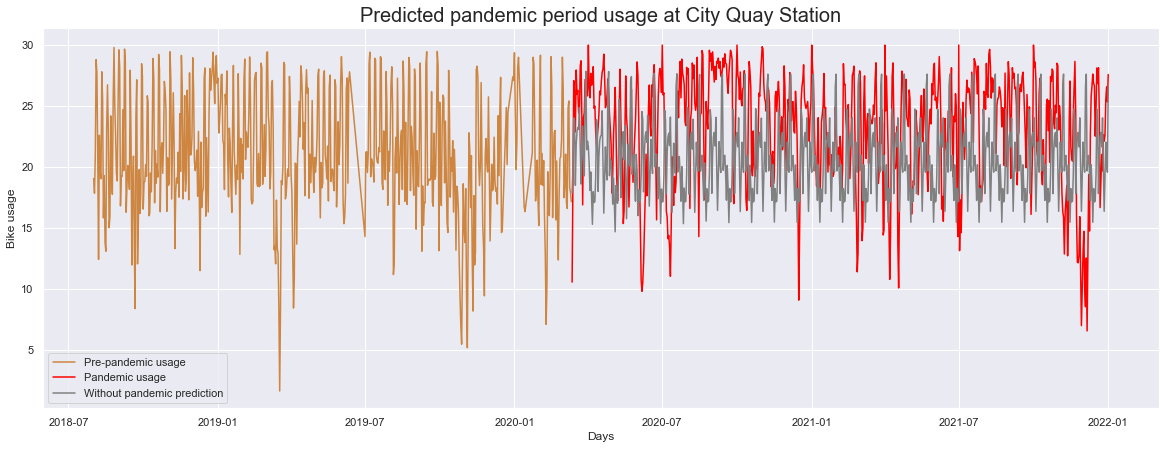

In [32]:
plt.figure(figsize=(20, 7))
plt.plot(city_y_train, label='Pre-pandemic usage', color='peru')
plt.plot(city_y_test, label='Pandemic usage', color='red')
plt.plot(city_prediction, label='Without pandemic prediction', color='grey')
plt.legend(loc = 'lower left')
plt.title('Predicted pandemic period usage at City Quay Station', size=20)
plt.xlabel('Days')
plt.ylabel('Bike usage')
plt.savefig('images/city_predicted.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Grangegorman Station

In [33]:
# Splitting time periods for training and predicting at City Quay Station
grange_y_train = stands_grange[stands_grange.index < pd.to_datetime("2020-03-12", format='%Y-%m-%d %H:%M:%S')]
grange_y_test = stands_grange[stands_grange.index > pd.to_datetime("2020-03-11", format='%Y-%m-%d %H:%M:%S')]


In [34]:
# Grangegorman full train

grange_model = pm.auto_arima(grange_bike_range, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=28,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[28] intercept   : AIC=inf, Time=9.48 sec
 ARIMA(0,0,0)(0,1,0)[28] intercept   : AIC=3587.219, Time=0.17 sec
 ARIMA(1,0,0)(1,1,0)[28] intercept   : AIC=3153.308, Time=3.20 sec
 ARIMA(0,0,1)(0,1,1)[28] intercept   : AIC=inf, Time=9.17 sec
 ARIMA(0,0,0)(0,1,0)[28]             : AIC=3585.248, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[28] intercept   : AIC=3301.065, Time=0.40 sec
 ARIMA(1,0,0)(2,1,0)[28] intercept   : AIC=3094.940, Time=8.54 sec
 ARIMA(1,0,0)(2,1,1)[28] intercept   : AIC=inf, Time=35.07 sec
 ARIMA(1,0,0)(1,1,1)[28] intercept   : AIC=inf, Time=9.97 sec
 ARIMA(0,0,0)(2,1,0)[28] intercept   : AIC=3378.292, Time=6.26 sec
 ARIMA(2,0,0)(2,1,0)[28] intercept   : AIC=3087.348, Time=11.02 sec
 ARIMA(2,0,0)(1,1,0)[28] intercept   : AIC=3141.644, Time=3.73 sec
 ARIMA(2,0,0)(2,1,1)[28] intercept   : AIC=inf, Time=46.59 sec
 ARIMA(2,0,0)(1,1,1)[28] intercept   : AIC=inf, Time=14.44 sec
 ARIMA(3,0,0)(2,1,0)[28] intercept   : AIC=30

In [35]:
grange_prediction = pd.DataFrame(grange_model.predict(n_periods = 661), index=grange_y_test.index)
prediction.columns = ['Predicted Daily Usage']
grange_prediction

,0
2020-03-12,36.642933
2020-03-13,35.712390
2020-03-14,36.058280
2020-03-15,36.095581
2020-03-16,37.113896
...,...
2021-12-28,34.447001
2021-12-29,35.214268
2021-12-30,32.204109
2021-12-31,28.085189


### Plot total period with predicted values for Grangegorman without the pandemic

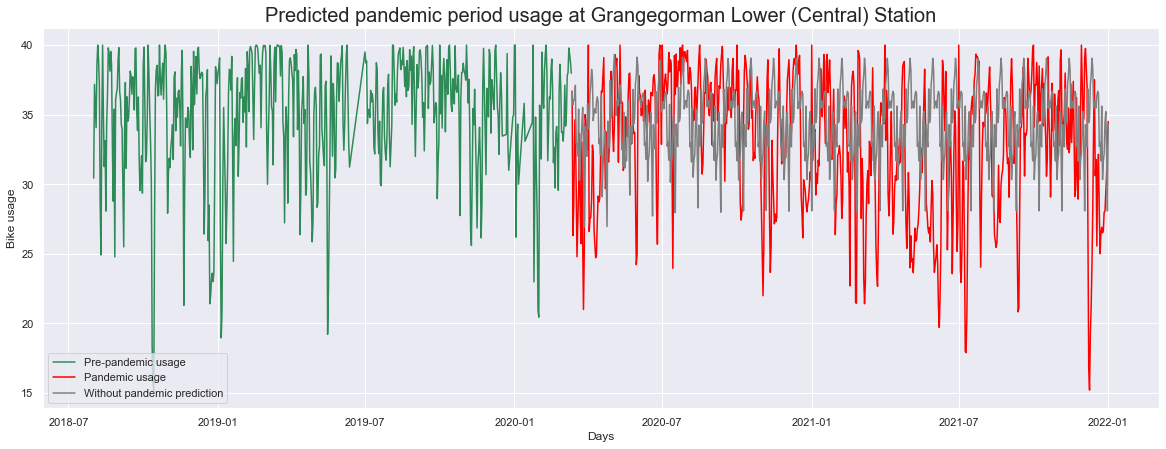

In [36]:
plt.figure(figsize=(20, 7))
plt.plot(grange_y_train, label='Pre-pandemic usage', color='seagreen')
plt.plot(grange_y_test, label='Pandemic usage', color='red')
plt.plot(grange_prediction, label='Without pandemic prediction', color='grey')
plt.legend(loc = 'lower left')
plt.title('Predicted pandemic period usage at Grangegorman Lower (Central) Station', size=20)
plt.xlabel('Days')
plt.ylabel('Bike usage')
plt.savefig('images/grange_predicted.jpg', dpi=300, bbox_inches='tight')
plt.show()